# Introduction

<div style="text-align:justify">Web scraping adalah proses ekstrasi data dan informasi secara otomatis pada website. Proses ini biasanya dilakukan ketika ingin mengetahui lebih dalam tentang sebuah informasi, namun data yang digunakan untuk dilakukan analisis tidak tersedia di berbagai repositori.</div>
<div style="text-align:justify">Pada tulisan ini, saya akan membagikan contoh cara penarikan data pada website Femaledaily untuk kemudian dianalisis agar menghasilkan informasi yang bermanfaat untuk para pengguna aktif Femaledaily terutama yang menggemari produk skincare.</div>
<div style="text-align:justify">Femaledaily sendiri adalah sebuah website yang berisikan artikel dan review-review pada produk kecantikan. Website ini memiliki sasaran pengguna mayoritas wanita. Terdapat berbagai macam kategori produk kecantikan yang ditampilkan pada website ini, meliputi skincare, make-up, nail, fragrance, hair and body. Dan dari masing-masing kategori tersebut terdapat beberapa sub-kategori, dimana sub-kategori berisikan nama-nama produk kecantikan yang di ulas oleh beberapa reviewer.</div>
<div style="text-align:justify">Tujuan utama pada tulisan kali ini adalah menganalisa lebih lanjut tentang informasi-informasi yang dapat diperoleh dan bermanfaat pada kategori produk skincare. Informasi tersebut meliputi, kategori produk apa saja yang paling sering direview oleh pengguna, siapa saja reviewer yang aktif memberikan ulasan/review baik pada masing-masing produk kategori, dan lain-lain.</div>

# Proses Scraping

<h3>Library</h3>

<b>Selenium </b>,
<b>BeautifulSoup </b>,
<b>Chromedriver </b>

In [4]:
import requests
from bs4 import BeautifulSoup #web scraping library
from selenium import webdriver #web scraping library
from selenium.common import exceptions
import pandas as pd
import selenium
from tqdm import tqdm

In [2]:
#import webdriver from local path
browser = webdriver.Chrome('E:/ALGORITMA/driver/chromedriver.exe')
#targeted url address
url = "https://femaledaily.com/category/skincare"
#get response from url
response = browser.get(url)


<h3><b>Memulai penarikan HTML dan XML file</b></h3>
<h4><b>Halaman ke-1</b></h4>

In [3]:
category_root = browser.find_element_by_class_name('jsx-3263867242.category-landing-list')
category_column = category_root.find_elements_by_class_name('jsx-3263867242.category-landing-column')

#list of category
list_of_category = []
list_of_href = []

for i in category_column:
    get_category_name = i.find_elements_by_tag_name("a")
    for cat in get_category_name:
        list_of_category.append(cat.text)
        list_of_href.append(cat.get_attribute('href'))

<h4><b>Halaman ke-2</b></h4>

In [4]:
import time
import numpy as np

list_of_product = []
list_href_product = []
list_prod_category = []

#loop page for each category
for i in [0]:
    x = list_of_href[i][:-1]
    cat_name = list_of_category[i]
    prod_list = [] 
    for page in range(1,11):
        source = requests.get(x+str(page))
        data = BeautifulSoup(source.content, 'html.parser')
        body = data.find('body')
        div = body.find("div",{"class":"jsx-489929435"})
        for div in div.find_all("div",attrs = {"class":"jsx-3541907014 product-item"}):
            for link in div.find_all("div",attrs = {"class":"jsx-3920372551 product-card-catalog"}):
                product_item = link.find('a')
                prod_link = product_item.get('href')
                list_href_product.append('https://reviews.femaledaily.com'+prod_link)
                div_prod = link.find('div',attrs = {"class":"jsx-3920372551"})
                list_of_product.append(div_prod.a.text)
                prod_list.append(div_prod.a.text)
    categories = [cat_name] * len(prod_list)
    list_prod_category.append(categories)
#crate list of category which have same length with product name
name_of_category = list(np.array(list_prod_category).flatten())


<h4><b>Halaman ke-3</b></h4>

In [5]:
import datetime
from dateutil import parser

list_of_reviewer = []
list_of_date = []
list_of_star = []
list_of_recommends = []
list_of_product_name = []
list_of_product_category = []
date_now =[]
list_href_prod_save = []
list_of_review = []
href_prod = []

for i in tqdm(range(len(list_href_product))):
    x = list_href_product[i][:-1]
    prod_name = list_of_product[i]
    category_name = name_of_category[i]
    href_prod = list_href_product[i].split("?")[0]
    time.sleep(5)
    for page in range(1,11):
        try:
            total_review = 0
            source = requests.get(x+str(page))
            data_review = BeautifulSoup(source.content, 'html.parser')
            body_review = data_review.find('body')
            div_review = body_review.find("div",{"class":"jsx-807469956 d-flex review-content-container"})
            for div in div_review.find_all("div",attrs = {"class":"jsx-807469956 item"}):
                 for rev in div.find_all("div",attrs = {"class":"review-detail d-flex"}):
                        total_review += 1
                        #get the reviewer name
                        reviewer = rev.find("div",attrs = {"class":"profile-wrapper"})
                        #review_text = rev.find("p",attrs = {"class":"text-content"})
                        list_of_reviewer.append(reviewer.p.a.text)
                        #list_of_review.append(review_text.text)
                        #get the reviewer recommendation
                        star_root = rev.find("span",attrs = {"class":"cardrv-starlist"})
                        recommends_root = rev.find_all("i",attrs = {"class":"icon-ic_thumbs_up"})
                        no_recommends_root = rev.find_all("i",attrs = {"class":"icon-ic_thumbs_down"})
                        if recommends_root:
                            recommends = "Yes"
                        elif no_recommends_root:
                            recommends = "No"
                        else:
                            recommends = "Null"
                        list_of_recommends.append(recommends)
                        #get count of stars
                        star = star_root.find_all("i",attrs = {"class":"icon-ic_big_star_full"})
                        list_of_star.append(len(star))
                        #get date
                        date_root = rev.find("p",attrs = {"class":"date review-date"})
                        list_of_date.append(date_root.text)
                        date_now.append(datetime.datetime.now())
            list_of_product_name = np.append(list_of_product_name, np.array([prod_name] * total_review))
            list_href_prod_save = np.append(list_href_prod_save, np.array([href_prod]*total_review))
            list_of_product_category = np.append(list_of_product_category, np.array([category_name] * total_review))
           
        except:
            break

100%|██████████| 20/20 [02:14<00:00,  6.74s/it]


<h4><b>Hasil Akhir</b></h4>
Ubah dan gabung list yang ada kedalam bentuk CSV format

In [ ]:
df = pd.DataFrame(list(zip(list_of_reviewer,list_of_recommends,list_of_star,list_of_date,date_now,list_href_prod_save,list_of_review)),
             columns=['Reviewer', 'Recommend', 'Stars', 'Date','Date Scrape','url','text'])

In [ ]:
df.to_csv("Female Daily Skincare Review Final.csv", index=False, header=True)

# Explorasi, Analisis, dan Visualisasi

<div style="text-align:justify">Setelah mendapatkan data dari proses scraping, langkah selanjutnya adalah melakukan explorasi, analisis dan visualisasi pada data. Hal ini bertujuan untuk menggali informasi lebih dalam tentang data review pada Femaledaily agar menghasilkan <i>output</i> berupa informasi yang bermanfaat bagi pembaca khususnya pecinta produk <i>skincare.</i></div>


<h4><b>Import and Read CSV File</b></h4>

In [5]:
femaledaily = pd.read_csv("Female Daily Skincare Review Final.csv")

In [6]:
femaledaily

,Reviewer,Recommend,Stars,Date,Product,Category,Date Scrape,Url
0,Ayuika,No,3,5 days ago,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.875052,https://reviews.femaledaily.com/products/moist...
1,yustinalupit,Yes,4,16 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.876053,https://reviews.femaledaily.com/products/moist...
2,evikdanny,No,3,13 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.878054,https://reviews.femaledaily.com/products/moist...
3,daniskhoirun,Yes,3,08 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.880038,https://reviews.femaledaily.com/products/moist...
4,hulahup19,Yes,5,08 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.882056,https://reviews.femaledaily.com/products/moist...
...,...,...,...,...,...,...,...,...
164239,steph91,Null,4,06 Nov 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.755206,https://reviews.femaledaily.com/products/clean...
164240,farishaalamsyah,Null,1,27 Oct 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.757207,https://reviews.femaledaily.com/products/clean...
164241,imeldanababan,Null,4,28 Sep 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.759209,https://reviews.femaledaily.com/products/clean...
164242,princessvie,Null,3,23 Sep 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:07.132358,https://reviews.femaledaily.com/products/clean...


<h4><b>Melihat dimensi dan ukuran pada data</b></h4>

In [7]:
print(femaledaily.shape)
print(femaledaily.size)

(164244, 8)
1313952


<div style="text-align:justify">Dari hasil diatas dapat diketahui bahwa data review Femaledaily memiliki 164244 baris dan 8 kolom. Dimana masing-masing kolom memuat informasi yang berbeda. Berikut adalah detail informasi pada kolom:</div>

* Reviewer     : Nama reviewer yang melakukan review pada produk skincare.
* Recommend    : Testimoni yang diberikan oleh reviewer apakah mereka merekomendasikan produk tersebut atau tidak (Null = tidak merekomendasikan iya/tidak ; Yes = merekomendasikan produk tersebut ; No = tidak merekomendasikan produk tersebut)
* Stars        : Bintang yang diberikan pada produk
* Date         : Tanggal seorang reviewer melakukan review
* Product      : Nama produk yang direview
* Category     : Nama kategori produk yang direview
* Date Scrape  : Tanggal penarikan data (kolom ini bermanfaat ketika akan melakukan konversi tanggal pada kolom "Date", hasil pengurangan "Data Scrape" dengan "Date" pada format datetime akan menghasilkan informasi kapan seorang reviewer memberikan review pada produk).
* Url          : Alamat URL pada masing-masing halaman

<h4><b>Melakukan <i>renaming</i> pada kolom</b></h4>

In [8]:
femaledaily.rename(columns ={"Reviewer":"reviewer","Recommend":"recommend","Stars":"stars","Date":"date","Product":"product",
                            "Category":"category","Date Scrape":"date_scrape","Url":"url"}, inplace=True)

<h4><b>Melakukan pengecekan dan penggantian tipe data</b></h4>

In [9]:
femaledaily.dtypes

reviewer       object
recommend      object
stars           int64
date           object
product        object
category       object
date_scrape    object
url            object
dtype: object

<div style="text-align:justify">Hasil diatas menunjukkan bahwa terdapat beberapa kolom memiliki tipe data yang tidak sesuai. Kita harus melakukan penggantian tipe data agar sesuai pada masing-masing kolom. </div> 

In [10]:
#Recommend and Category should be category
#Date Scrape and Date Convert should be datetime
femaledaily[['recommend','category']] = femaledaily[['recommend','category']].astype('category')
femaledaily['date_scrape'] = pd.to_datetime(femaledaily['date_scrape'])

In [11]:
femaledaily.dtypes

reviewer               object
recommend            category
stars                   int64
date                   object
product                object
category             category
date_scrape    datetime64[ns]
url                    object
dtype: object

<h4><b>Melakukan pengecekan dan penanganan pada <i>missing value</i></b></h4>
<div style="text-align:justify">Langkah selanjutnya adalah melakukan pengecekan dan penghapusan terhadap <i>missing value.</i></div>

In [12]:
femaledaily.isna().sum()

reviewer       2
recommend      0
stars          0
date           0
product        0
category       0
date_scrape    0
url            0
dtype: int64

In [13]:
#Drop Missing Values
femdaily = femaledaily.dropna()

<h4><b>Melakukan pengecekan dan penanganan pada data yang berulang <i>duplicated data.</i></b></h4>
<div style="text-align:justify">Setelah melakukan pengecekan dan penanganan pada <i>missing value</i>, lakukan juga pengecekan dan penanganan pada data data yang berulang.</div>

In [14]:
femdaily.duplicated().sum()

8105

In [15]:
femdaily[femdaily.duplicated(keep = False)].head(10)

,reviewer,recommend,stars,date,product,category,date_scrape,url
8015,fikriaaa,Null,5,21 Dec 2017,Mid-Day Miracle Essence,Face Mist,2020-02-24 14:18:02.854962,https://reviews.femaledaily.com/products/moist...
8016,fikriaaa,Null,5,21 Dec 2017,Mid-Day Miracle Essence,Face Mist,2020-02-24 14:18:02.854962,https://reviews.femaledaily.com/products/moist...
8780,Karesian17,Null,5,06 Jul 2018,Water Science Mist,Face Mist,2020-02-24 14:25:23.363466,https://reviews.femaledaily.com/products/moist...
8781,Karesian17,Null,5,06 Jul 2018,Water Science Mist,Face Mist,2020-02-24 14:25:23.363466,https://reviews.femaledaily.com/products/moist...
9704,yeen1795,Null,5,05 Aug 2019,Pearly White UV Essence Cream,Day Cream,2020-02-24 15:03:22.477697,https://reviews.femaledaily.com/products/moist...
9705,yeen1795,Null,5,05 Aug 2019,Pearly White UV Essence Cream,Day Cream,2020-02-24 15:03:22.477697,https://reviews.femaledaily.com/products/moist...
9715,windaliffia,Null,3,11 Jul 2019,Pearly White UV Essence Cream,Day Cream,2020-02-24 15:03:22.987164,https://reviews.femaledaily.com/products/moist...
9716,windaliffia,Null,3,11 Jul 2019,Pearly White UV Essence Cream,Day Cream,2020-02-24 15:03:22.987164,https://reviews.femaledaily.com/products/moist...
10428,AyaNagi,Null,4,06 Jul 2019,Light Complete White Speed Yuzu Whitening Seru...,Day Cream,2020-02-24 15:04:36.029492,https://reviews.femaledaily.com/products/moist...
10429,AyaNagi,Null,4,06 Jul 2019,Light Complete White Speed Yuzu Whitening Seru...,Day Cream,2020-02-24 15:04:36.029492,https://reviews.femaledaily.com/products/moist...


In [16]:
femdaily.drop_duplicates(keep = "first", inplace=True)

C:\Users\litaimut\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
femdaily.duplicated().sum()

0

<h4><b>Melakukan konversi pada kolom "date" menjadi format <i>datetime</i></b></h4>


In [18]:
date_fm = femdaily['date'].to_list()

In [19]:
dictarray = {
  'a day ago':'1 days ago',
  'an hour ago':'1 hours ago',
   }
subs = sorted(dictarray.items(), key=lambda pair: len(pair[1]), reverse=True)
def replace_first(s, subs):
    for old, new in subs:
        if s.startswith(old):
             return s.replace(old, new, 1)
    return s
new_list_date = [replace_first(s, subs) for s in date_fm]
            

In [20]:
import datetime
from dateutil import parser

parsed_s = []
parsed_date = []
for i in new_list_date:
    if(i[-3:] == "ago") :
        amount, fmt = i.split()[:2]
        time_dict = {fmt: float(amount)}
        dt = datetime.timedelta(**time_dict)
        past_time = femdaily['date_scrape'][1]- dt
    else :
        past_time = parser.parse(i).date()
    parsed_date.append(past_time)


In [21]:
femdaily['date_convert'] = parsed_date
femdaily

C:\Users\litaimut\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,reviewer,recommend,stars,date,product,category,date_scrape,url,date_convert
0,Ayuika,No,3,5 days ago,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.875052,https://reviews.femaledaily.com/products/moist...,2020-02-19 13:35:12.876053
1,yustinalupit,Yes,4,16 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.876053,https://reviews.femaledaily.com/products/moist...,2020-02-16 00:00:00.000000
2,evikdanny,No,3,13 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.878054,https://reviews.femaledaily.com/products/moist...,2020-02-13 00:00:00.000000
3,daniskhoirun,Yes,3,08 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.880038,https://reviews.femaledaily.com/products/moist...,2020-02-08 00:00:00.000000
4,hulahup19,Yes,5,08 Feb 2020,Perfect 3D Gel,Night Cream,2020-02-24 13:35:12.882056,https://reviews.femaledaily.com/products/moist...,2020-02-08 00:00:00.000000
...,...,...,...,...,...,...,...,...,...
164239,steph91,Null,4,06 Nov 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.755206,https://reviews.femaledaily.com/products/clean...,2015-11-06 00:00:00.000000
164240,farishaalamsyah,Null,1,27 Oct 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.757207,https://reviews.femaledaily.com/products/clean...,2015-10-27 00:00:00.000000
164241,imeldanababan,Null,4,28 Sep 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:06.759209,https://reviews.femaledaily.com/products/clean...,2015-09-28 00:00:00.000000
164242,princessvie,Null,3,23 Sep 2015,Ultra Rapid Action Pad,Toner,2020-02-25 17:01:07.132358,https://reviews.femaledaily.com/products/clean...,2015-09-23 00:00:00.000000


<h4><b>Melakukan penghapusan pada kolom yang tidak digunakan</b></h4>

In [22]:
femdaily.drop(['date','date_scrape','url'],axis=1,inplace=True)

C:\Users\litaimut\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
femdaily

,reviewer,recommend,stars,product,category,date_convert
0,Ayuika,No,3,Perfect 3D Gel,Night Cream,2020-02-19 13:35:12.876053
1,yustinalupit,Yes,4,Perfect 3D Gel,Night Cream,2020-02-16 00:00:00.000000
2,evikdanny,No,3,Perfect 3D Gel,Night Cream,2020-02-13 00:00:00.000000
3,daniskhoirun,Yes,3,Perfect 3D Gel,Night Cream,2020-02-08 00:00:00.000000
4,hulahup19,Yes,5,Perfect 3D Gel,Night Cream,2020-02-08 00:00:00.000000
...,...,...,...,...,...,...
164239,steph91,Null,4,Ultra Rapid Action Pad,Toner,2015-11-06 00:00:00.000000
164240,farishaalamsyah,Null,1,Ultra Rapid Action Pad,Toner,2015-10-27 00:00:00.000000
164241,imeldanababan,Null,4,Ultra Rapid Action Pad,Toner,2015-09-28 00:00:00.000000
164242,princessvie,Null,3,Ultra Rapid Action Pad,Toner,2015-09-23 00:00:00.000000


<h4><b>Visualisasi</b></h4>
Proses visualisasi menggunakan library seaborn dan matplotlib

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<b>Melihat grafik jumlah review yang diberikan berdasarkan tahun</b>

In [25]:
femdaily['year'] = femdaily['date_convert'].dt.year
count_date = pd.crosstab(index=femdaily.year, 
                    columns="number_of_date").sort_values("year", ascending=True).reset_index()
count_date

C:\Users\litaimut\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


col_0,year,number_of_date
0,2013,59
1,2014,59
2,2015,3997
3,2016,5822
4,2017,7545
5,2018,31566
6,2019,84917
7,2020,22172


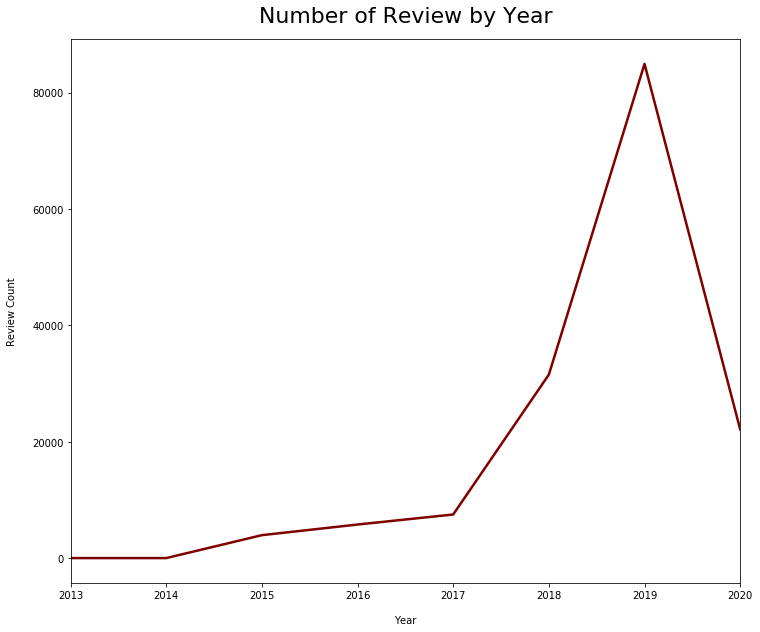

In [26]:
count_date.set_index('year')['number_of_date'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Review Count", labelpad=15)
plt.title("Number of Review by Year", y=1.02, fontsize=22);

<div style="text-align:justify">Hasil visualisasi <i>line plot</i> diatas menunjukkan bahwa reviewer mulai aktif memberikan komentar (review) pada tahun 2017. Dan mengalami kenaikan yang signifikan di tahun 2018 -2019. Pada tahun 2020 mengalami penurunan dikarenakan proses penarikan data baru saja dilakukan pada bulan februari, jadi masih terdapat informasi yang kurang untuk ditampilkan </div>

<b>Melihat distribusi testimoni yang diberikan oleh reviewer</b>


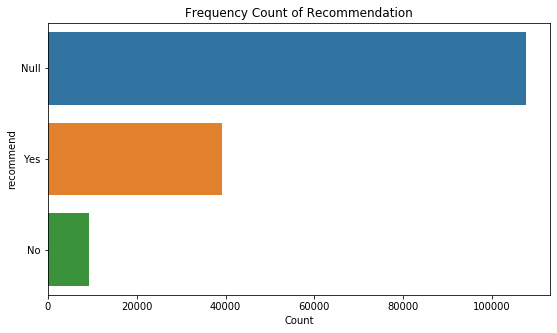

In [27]:
plt.subplots(figsize=(9,5))
sns.countplot(y="recommend", data=femdaily,order=femdaily["recommend"].value_counts().index)
plt.title("Frequency Count of Recommendation")
plt.xlabel("Count")
plt.show()

<div style="text-align:justify">Hasil visualisasi diatas menunjukkan bahwa dari dari data yang ada, kebanyakan reviewer tidak memberikan testimoni "Ya" yang berarti produk tersebut direkomendasikan dan "Tidak" yang berarti produk tersebut tidak direkomendasikan. Setelah melakukan pengamatan secara manual pada halaman Femaledaily yang ada, hal tersebut disebabkan karena fitur untuk memberikan rekomendasi tersebut baru tersedia pada sekitar awal tahun 2019, dan pada awal tahun pun pengguna situs masih belum terbiasa dengan fitur baru tersebut. Sehingga terjadilah distribusi yang tidak seimbang pada testimoni yang diberikan.</div>

<b>Melihat 10 produk teratas yang paling sering mendapatkan komentar</b>
<div style="text-align:justify">Dari beberapa kategori yang ada, akan dilakukan visualisasi dan analisa kira-kira kategori produk apa yang paling sering di-review oleh pengguna</div>

In [28]:
#Top 10 product categories which most often reviewed
top_10_categories = femdaily.groupby('category').agg({'category':'count'}).rename(columns = {'category':'number_of_review'}).sort_values('number_of_review',ascending=False)[:10].reset_index()

In [29]:
#top_10_categories['category'] = top_10_categories['category'].astype('category').cat.remove_unused_categories()
top_10_categories


,category,number_of_review
0,Facial Wash,16837
1,Wash-Off,14642
2,Serum & Essence,14381
3,Toner,13613
4,Mask Sheet,13204
5,Day Cream,12863
6,Acne Treatment,9448
7,Sun Protection,8095
8,Makeup Remover,7706
9,Lotion & Emulsion,7325


In [30]:
top_10_categories.set_index('category', inplace=True)
top_10_categories

,number_of_review
category,
Facial Wash,16837
Wash-Off,14642
Serum & Essence,14381
Toner,13613
Mask Sheet,13204
Day Cream,12863
Acne Treatment,9448
Sun Protection,8095
Makeup Remover,7706


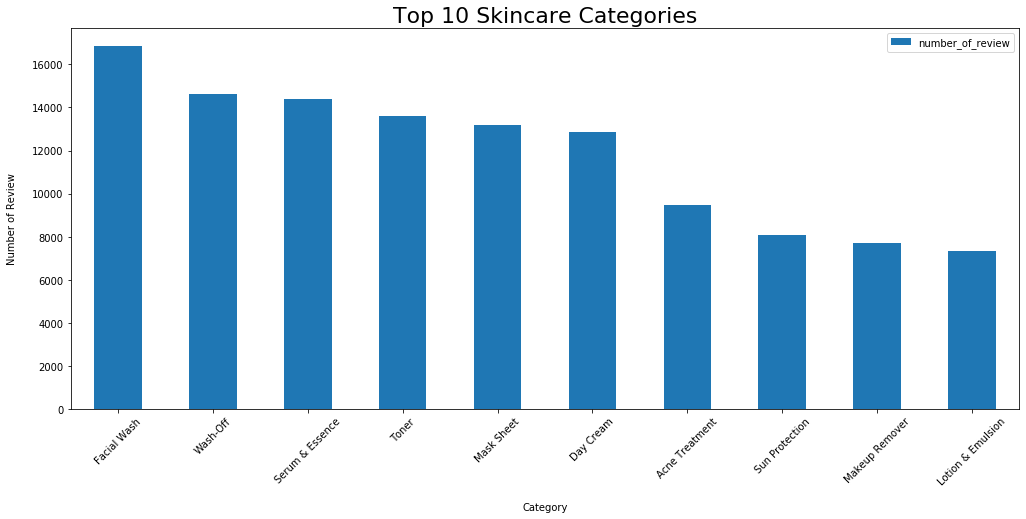

In [46]:
plt.rcParams['figure.figsize'] = 17, 7
top_10_categories.plot(kind='bar')
plt.xlabel("Category", labelpad=15)
plt.ylabel("Number of Review", labelpad=15)
plt.xticks(rotation=45)
plt.title("Top 10 Skincare Categories", fontsize=22);

In [172]:
# plt.rcParams['figure.figsize'] = 17, 7
# sns.barplot(x='category', y='number_of_review' ,data=top_10_categories.sort_values(by='number_of_review', ascending=False));

<div style="text-align:justify">Hasil menunjukkan bahwa "Facial Wash" adalah kategori produk yang paling sering di review oleh pengguna dibandingkan dengan kategori produk yang lain. Diikuti oleh "Wash Off", "Serum & Essence", dan kemudian "Toner". Hal tersebut menunjukkan bahwa tingkat penggunaan "Facial Wash" sangat tinggi dibandingkan kategori produk yang lain. </div>

<b>Melihat 10 presentase produk yang paling banyak di review pada kategori produk Facial Wash</b>

In [34]:
facial_wash = femdaily[femdaily.category == 'Facial Wash']
facial_wash.dtypes

reviewer                object
recommend             category
stars                    int64
product                 object
category              category
date_convert    datetime64[ns]
year                     int64
dtype: object

In [35]:
most_review = facial_wash.groupby(['product', 'recommend']).agg({'recommend':'count'}).rename({'recommend':'count_rec'},axis=1).reset_index()

In [36]:
most_review['recommend']=most_review['recommend'].astype('object')

In [37]:
most = pd.crosstab(index=most_review['product'], columns=most_review['recommend'], values=most_review['count_rec'], aggfunc = 'sum')
review_most = most.reset_index().drop(columns=['Null']).sort_values(['Yes'], ascending=False)
review_most.isna().sum()
review_most.dropna(inplace=True)
review_most['precentage_yes'] = review_most['Yes']/review_most.sum(axis=1)
review_most['precentage_no'] = review_most['No']/review_most.sum(axis=1)
review_most = review_most.drop(columns=['No','Yes'])[:10]
review_most.sort_values(['precentage_yes'], ascending=False)

recommend,product,precentage_yes,precentage_no
143,Refreshing Facial Wash Gel,0.949495,0.050025
125,Perfect Whip,0.909091,0.090376
158,Sparkling White Facial Foam,0.870000,0.128879
160,Tamagohada Mild Peeling Face Wash,0.830000,0.168601
76,Gokujyun Ultimate Moisturizing Face Wash,0.824742,0.173780
116,Nature Daily Aloe Hydramild Facial Wash,0.816327,0.182156
74,Gentle Skin Cleanser,0.806122,0.192296
148,Sakura White Pinkish Glow Whip Foam,0.804124,0.194266
100,Low pH Good Morning Gel Cleanser,0.797980,0.200405
163,Tea Tree Skin Clearing Facial Wash,0.767742,0.231113


In [38]:
review_most = pd.melt(review_most,id_vars=['product'],var_name='metrics', value_name='count').sort_values(['product'], ascending=False)


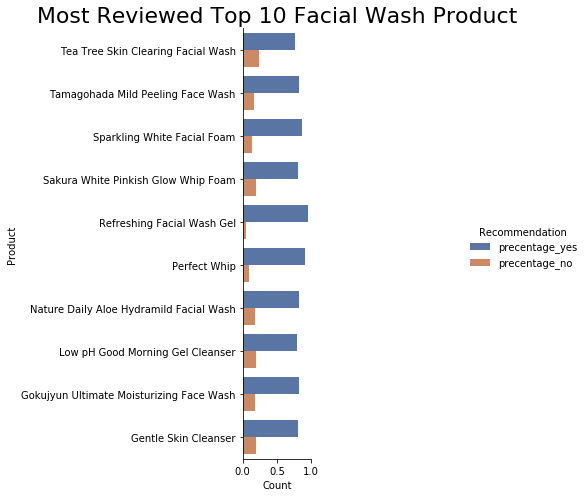

In [41]:
ax = sns.catplot(x='count', y='product', data=review_most, kind='bar', hue='metrics', palette="deep", legend_out=True)
# title
new_title = 'Recommendation'
ax._legend.set_title(new_title)
#ax.set_xticklabels(rotation=30)
ax.fig.set_size_inches(15,7)
ax = (ax.set_axis_labels("Count","Product").set(xlim=(0,1)))
plt.title('Most Reviewed Top 10 Facial Wash Product', size=22)
plt.show(ax)


<div style="text-align:justify">Dari hasil tabel dan visualisasi diatas, dapat diketahui bahwa pada kategori "Facial Wash" produk "Refreshing Facial Wash Gel" adalah produk yang paling sering direkomendasikan oleh pengguna, dengan presentase "Yes" (produk tersebut direkomendasikan) yang dimiliki sebesar 94%. Diikuti oleh "Perfect Whip" pada posisi ke dua dan "Sparkling White Facial Foam" pada posisi ke tiga. Hal ini dapat dijadikan acuan oleh para pecinta skincare yang akan membeli produk dalam kategori Facial Wash, untuk memilih satu diantara ke tiga produk tersebut</div>

<b>Melihat nama pengguna/reviewer yang paling sering memberikan rekomendasi yang bagus pada tiap kategori produk</b><br>
<div style="text-align:justify">Pada website femaledaily terdapat beberapa nama-nama reviewer (biasanya seorang beauty enthusiast) yang dapat diikuti perkembangannya dalam mereview beberapa produk tertentu. Analisis kali ini akan menampilkan nama-nama reviewer yang aktif memberikan testimoni positif pada masing-masing kategori produk</div>


In [ ]:
yes_recommend = femdaily[femdaily.recommend == 'Yes']

In [94]:
reviewer_hb = yes_recommend.groupby(['category','reviewer']).agg({'recommend':'count'}).sort_values(['recommend'], ascending=False).groupby(['category']).head(1).reset_index()

In [95]:
reviewer_hb

,category,reviewer,recommend
0,Mask Sheet,medinasfryn,28
1,Skin Soothing Treatment,firmanzaman,25
2,Facial Wash,carolitavph,17
3,Wash-Off,nitahakeem,15
4,Sleeping Mask,Tazkiakhoirunnisa,14
5,Cream & Lotion,Dianset,13
6,Sun Protection,anieno,11
7,Scrub & Exfoliator,purnamarzky,10
8,Serum & Essence,AngelinaEllyza,9
9,Makeup Remover,Falasifah18,8


<div style="text-align:justify">Hasil tabel diatas menunjukkan bahwa "medinasfryn" sangat aktif memberikan testimoni yang baik pada kategori produk "Mask Sheet", hal ini menunjukkan bahwa dia sangat cocok dan sering sekali melakukan perawatan wajah menggunakan mask sheet. Pada posisi kedua terdapat "firmanzaman" yang sering memberikan rekomendasi yang baik pada kategori produk "Skin Soothing Treatment". Hal ini sangat bermanfaat untuk para pecinta skincare dan penggiat situs femaledaily ketika akan membeli dua kategori produk tersebut, mereka dapat mengikuti akun ke dua reviewer tersebut untuk melihat testimoni pada produk-produk yang sangat disarankan.</div>

# Kesimpulan


<div style="text-align:justify">Proses scraping sangat dianjurkan ketika data yang kita inginkan tidak tersedia pada situs repositori manapun</div><br>
<div style="text-align:justify">Data yang berhasil diambil dari situs Femaledaily adalah data review pada kategori produk skincare. Dimana terdapat beberapa kolom-kolom utama seperti nama reviewer, tanggal review, testimoni yang diberikan, dan jumlah bintang yang diberikan. Dari hasil olah data dapat diketahui bahwa pengguna mulai sangat aktif memberikan review pada tahun 2018-2019. Dan kebanyakan dari mereka melakukan review pada kategori produk "Facial Wash"</div>
